# Lab 4: Image Processing

In this notebook you will apply filters to an image of your choice which you can then display within the notebook.

## 1. Load Overlay

In [14]:
import os
from pynq import PL
from pynq import Overlay
from pynq.lib.video import *
import cv2
from pynq import allocate
import matplotlib.pyplot as plt
import numpy as np
import time

In [15]:
# Edit the path to where your .bit and .hwh files are located
ol = Overlay("/home/xilinx/jupyter_notebooks/Lab4/base.bit")

In [26]:
vdma_in = ol.axi_vdma_1
vdma_out = ol.axi_vdma_0

In [27]:
sobel_acc = ol.sobel_accel_0

## 2. Load Your Image

Image size: 1920x1080 pixels.


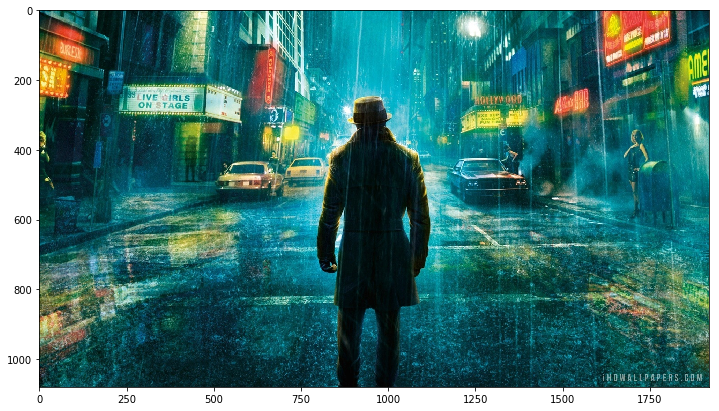

In [28]:
# Edit the path to your chosen image
src_bgr = cv2.imread("/home/xilinx/jupyter_notebooks/Lab4/pic.jpg")
src_rgb = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2RGB)
height = 1080
width = 1920
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
print("Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(src_rgb)

## 3. Implement Filter

In [29]:
#set the video mode of the DMA before starting
framemode = VideoMode(1920,1080,24)

In [30]:
vdma_in.writechannel.mode = framemode
vdma_out.readchannel.mode = framemode

In [31]:
#read from DRAM and pass to sobel_accel
vdma_in.writechannel.start()
#read from sobel_accel and pass to DRAM
vdma_out.readchannel.start()

In [32]:
# auto restart mode
sobel_acc.write(0x00,0x81)

In [33]:
in_buffer = allocate(shape=(height, width, 3), dtype=np.uint8, cacheable=1)
out_buffer = allocate(shape=(height, width, 3), dtype=np.uint8, cacheable=1)
in_buffer[:] = src_rgb

In [34]:
vdma_in.writechannel.setframe(in_buffer)

In [35]:
out_buffer = vdma_out.readchannel.readframe()

## 4. Display Filter Output

Image size: 1920x1080 pixels.


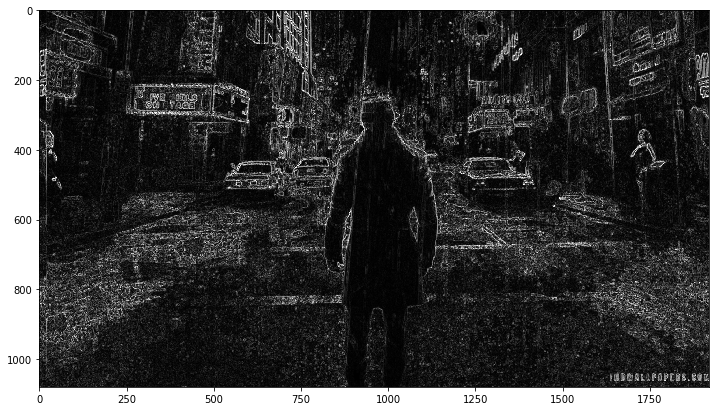

In [36]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
print("Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(out_buffer)

## 5. Save the Filter Ouput  

In [37]:
# Rename the output image of your filter
cv2.imwrite("FILTERED.jpg",out_buffer)

True

## 6. Reset the DMA Channel

In [38]:
# Reset to Flush Datas
vdma_in.writechannel.reset()
vdma_out.readchannel.reset()
ol.reset()

Notebook adapted from the project: https://github.com/21stars/pynq_cv